<a href="https://colab.research.google.com/github/Legodork13/-Predicting-the-cost-of-a-car-based-on-its-characteristics/blob/main/Predicting_the_cost_of_a_car_based_on_its_characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('/content/car data.csv')

In [3]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

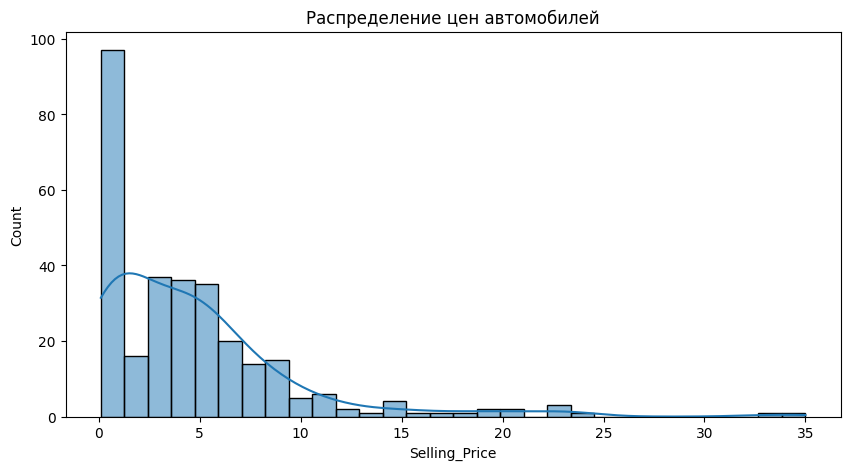

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π")
plt.show()

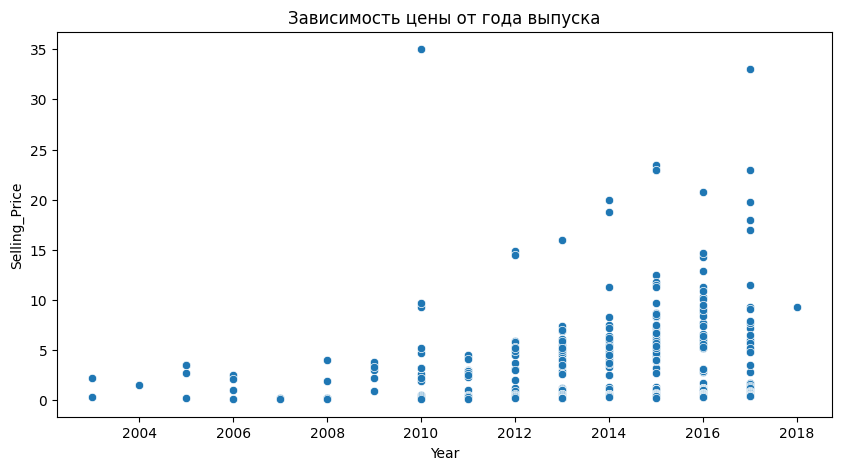

In [150]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Year', y='Selling_Price',data=df)
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –≥–æ–¥–∞ –≤—ã–ø—É—Å–∫–∞")
plt.show()

In [9]:
df = df.drop(['Car_Name'], axis=1)

In [65]:
X = df.drop('Selling_Price', axis=1)


In [97]:
Y = df['Selling_Price']

In [57]:
encoder=OneHotEncoder()
scaler=StandardScaler()

In [74]:
encoded=df[['Fuel_Type','Seller_Type','Transmission']]
scaled=df[['Year','Kms_Driven']]

In [40]:
df

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manual      0  
1         Manual      0  
2         Manual      0  
3         Manual      0  
4         Manual      0  
..           ...    ...  
296       Manual      0  
297       Manual      0  
298       Manual      0  
299       Manual      0  
300       Manual      0  

[301 rows x 8 columns]

In [77]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(encoded)
encoded_columns = encoder.get_feature_names_out(['Fuel_Type','Seller_Type','Transmission'])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)


In [78]:
scaled_columns=scaler.fit_transform(scaled)
scaled_df = pd.DataFrame(scaled_columns, columns=['Year','Kms_Driven'])

In [80]:
final_data = pd.concat([X, encoded_df, scaled_df], axis=1)

In [135]:
final_data

Present_Price  Owner  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0             5.59      0            0.0               0.0               1.0   
1             9.54      0            0.0               1.0               0.0   
2             9.85      0            0.0               0.0               1.0   
3             4.15      0            0.0               0.0               1.0   
4             6.87      0            0.0               1.0               0.0   
..             ...    ...            ...               ...               ...   
296          11.60      0            0.0               1.0               0.0   
297           5.90      0            0.0               0.0               1.0   
298          11.00      0            0.0               0.0               1.0   
299          12.50      0            0.0               1.0               0.0   
300           5.90      0            0.0               0.0               1.0   

     Seller_Type_Dealer  Seller_Type_Individual  Transmission_Automatic  \
0                   1.0                     0.0                     0.0   
1                   1.0                     0.0                     0.0   
2                   1.0                     0.0                     0.0   
3                   1.0                     0.0                     0.0   
4                   1.0                     0.0                     0.0   
..                  ...                     ...                     ...   
296                 1.0                     0.0                     0.0   
297                 1.0                     0.0                     0.0   
298                 1.0                     0.0                     0.0   
299                 1.0                     0.0                     0.0   
300                 1.0                     0.0                     0.0   

     Transmission_Manual  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0  
..                   ...  
296                  1.0  
297                  1.0  
298                  1.0  
299                  1.0  
300                  1.0  

[301 rows x 9 columns]

In [134]:
final_data=final_data.drop(['Kms_Driven'],axis=1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(final_data, Y, test_size=0.2,random_state=47)

In [137]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [144]:
# –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (y_pred) –∏ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (y_test)
mae = mean_absolute_error(y_test, y_pred)

print("\n" + "="*50)
print("–†–ï–ó–£–õ–¨–¢–ê–¢–´ –û–¶–ï–ù–ö–ò –ú–û–î–ï–õ–ò".center(50))
print("="*50)
print(f"\n–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): {mae:.2f}")
print(f"–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –º–æ–¥–µ–ª—å –æ—à–∏–±–∞–µ—Ç—Å—è –Ω–∞ ¬±{mae:.2f} –µ–¥–∏–Ω–∏—Ü")

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
if mae < 0.5:
    print("\nüîπ –û—Ç–ª–∏—á–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç! –ú–æ–¥–µ–ª—å –æ—á–µ–Ω—å —Ç–æ—á–Ω–∞—è")
elif mae < 1.5:
    print("\nüîπ –•–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç! –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –ø—Ä–∏–µ–º–ª–µ–º–æ–º —É—Ä–æ–≤–Ω–µ")
else:
    print("\nüîπ –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ:")
    print("   - –î–æ–±–∞–≤–∏—Ç—å –±–æ–ª—å—à–µ –¥–∞–Ω–Ω—ã—Ö")
    print("   - –ù–∞—Å—Ç—Ä–æ–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏")
    print("   - –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã –≤ –¥–∞–Ω–Ω—ã—Ö")

print("\n" + "="*50)


             –†–ï–ó–£–õ–¨–¢–ê–¢–´ –û–¶–ï–ù–ö–ò –ú–û–î–ï–õ–ò             

–°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ (MAE): 1.49
–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –º–æ–¥–µ–ª—å –æ—à–∏–±–∞–µ—Ç—Å—è –Ω–∞ ¬±1.49 –µ–¥–∏–Ω–∏—Ü

üîπ –•–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç! –¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –ø—Ä–∏–µ–º–ª–µ–º–æ–º —É—Ä–æ–≤–Ω–µ

